In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 한글문제 해결처리 
################################################################
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')
################################################################

df = pd.read_excel("의심환자검역정보(2020).xlsx")
df

,검역일시,검역소,국적,성별,승객승무원구분,검사결과
0,2019-01-01 04:21,국립인천공항검역소,한국,여,승객,양성
1,2019-01-01 04:21,국립인천공항검역소,한국,여,승객,양성
2,2019-01-01 06:10,국립김해검역소,한국,남,승객,양성
3,2019-01-01 06:25,국립인천공항검역소,한국,여,승객,양성
4,2019-01-01 06:25,국립인천공항검역소,한국,남,승객,양성
...,...,...,...,...,...,...
1864,2019-12-31 04:30,국립인천공항검역소,한국,여,승객,양성
1865,2019-12-31 04:30,국립인천공항검역소,한국,남,승객,양성
1866,2019-12-31 07:10,국립인천공항검역소,한국,여,승객,양성
1867,2019-12-31 11:53,국립인천공항검역소,한국,남,승객,양성


In [83]:
# url_stores = "https://8oi9s0nnth.apigw.ntruss.com/corona19-masks/v1/stores/json"
# url_sales = "https://8oi9s0nnth.apigw.ntruss.com/corona19-masks/v1/sales/json?page=1"
# json_stores = requests.get(url_stores).json()
# json_sales = requests.get(url_sales).json()
# #json_stores
# #json_sales

# data_women = []
# size_women = len(json_stores['storeInfos'])
# for inx in range(size_stores):
#     # print(json_stores['storeInfos'][inx]['code'], json_stores['storeInfos'][inx]['name'])
#     code, name = json_stores['storeInfos'][inx]['code'], json_stores['storeInfos'][inx]['name']
#     addr, lat, lng = json_stores['storeInfos'][inx]['addr'], json_stores['storeInfos'][inx]['lat'], json_stores['storeInfos'][inx]['lng']
#     data_stores.append([addr, code, lat, lng, name])
# df_stores = pd.DataFrame(data_stores, columns=['addr', 'code', 'lat', 'lng', 'name'])
# df_stores.shape
# df_stores

# data_sales = []
# size_sales = len(json_sales['sales'])
# for inx in range(size_sales):
#     # print(json_sales['sales'][inx]['code'],json_sales['sales'][inx]['remain_stat'])
#     code, remain_stat = json_sales['sales'][inx]['code'],json_sales['sales'][inx]['remain_stat']
#     data_sales.append([code, remain_stat])

# df_sales = pd.DataFrame(data_sales, columns=['code','remain_stat']) 
# df_sales.head()  
# df_stores.head() 
# df = pd.merge(df_stores, df_sales, on='code')
# df.head()
#----------------------------------------------------------------------------------------------------

# filter = data['sex'] == 'male'
# df_male = data[filter]
# filter2 = data['sex'] == 'female'
# df_female = data[filter2]
# df_male
# df_female
# data['bmi'] = data['weight'] / ((data['height']/100)*(data['height']/100))

# data
# filter = df[4] == '여'
# df_female = data[filter]

filter = df['성별'] == '여'
filter2 = df['성별'] == '남'

df_female = df[filter]
df_male = df[filter2]

size_female = len(df_female['성별'])
size_male = len(df_male['성별'])


# fig = plt.figure(figsize=(8,4))
# chart = fig.add_axes([0,0,1,1])
chart.bar(10,size_female, color='c', width=0.5)
chart.bar(10,size_male, color='lightblue', width=0.5)

#plt.hist(age, bins=[0,25,50,75,100]) #빈도수기준
#plt.hist(age, bins=[0,50,100])
#plt.plot(age) #값기준
#plt.title("age result")


<BarContainer object of 1 artists>

<BarContainer object of 2 artists>

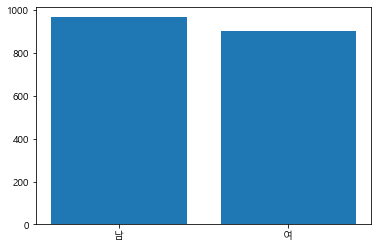

In [40]:
df2 = df.loc[:,['성별','검사결과']]
df3 = df2.groupby(by='성별').count().reset_index()

df3.columns = ['성별','검사건수']
df3
plt.bar(df3['성별'],df3['검사건수'])


In [73]:


df2 = df.loc[:,['성별','검사결과']]

df3 = df2.groupby(by=['성별']).count()
df4 = pd.DataFrame()
df5 = df2.groupby(by='성별').count()
df5


,검사결과
성별,
남,966
여,903


<BarContainer object of 2 artists>

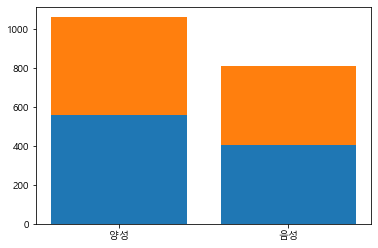

In [104]:
df7 = df.groupby(['성별', '검사결과']).size().reset_index(name='counts')
df7

f1 = df7['성별'] == '남'
f2 = df7['성별'] == '여'


men = df7[f1]
women = df7[f2]

men
women

plt.bar(men['검사결과'],men['counts'])
plt.bar(women['검사결과'],women['counts'],bottom=men['counts']) #밑에들어갈 바의 값을 bottom = 에 넣어주면 

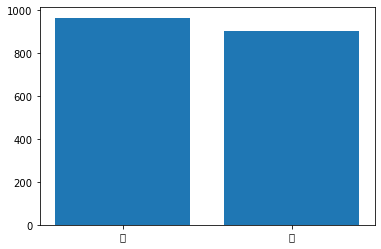

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 다음의 결과를 출력하시오. 성별을 기준으로 검사건수 다음과 같이 출력하시오.

df10 = pd.read_excel("의심환자검역정보(2020).xlsx")
df10 = df10.loc[:,['성별','검사결과']]
df11 = df10.groupby(by = '성별').count().reset_index() # .reset_index()의 역할은?
df11.columns = ['성별','검사건수']
df11
plt.bar(df11['성별'],df11['검사건수']) #왜 남/여 인덱스 안나올까?
plt.show()

In [33]:
import pandas as pd
import numpy as np
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

df = pd.read_excel("의심환자검역정보(2020).xlsx")
df2 = df.loc[:,['성별','검사결과','국적']] #국적을 받아와야 나머지 인덱스기준으로 카운트했을때 숫자를 센다.
df2
df3 = df2.groupby(by=['성별','검사결과']).count().reset_index()
df3.columns = ['성별','검사결과','count']

ind = ['남','여'] #뭐하는 앤지?

men = df3.iloc[:2,2] #남자 count만 슬라이싱
women = df3.iloc[2:,2] #여자 count만 슬라이싱
# ind = ['양성','음성']
# plt.bar(ind, men, color='y')
# plt.bar(ind, women, bottom=men, color='r')
# plt.legend(labels=['남자','여자'])
# plt.show()
# # print(list(men))
# # print(list(women))
# # print(df4)

NameError: name 'df4' is not defined